<a href="https://colab.research.google.com/github/TimurMMD/transaction_project/blob/main/Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project of analyzing and exploring transaction data.**
  
The link to this dataset:
https://www.kaggle.com/datasets/faizaniftikharjanjua/metaverse-financial-transactions-dataset

---



> *This dataset provides blockchain financial transactions within the Open Metaverse, designed for the development and testing of advanced analytics in fraud detection, risk assessment, and user behavior analysis. It encompasses 78,600 transactions across a diverse set of parameters, including transaction types, amounts, user activity profiles, and risk scores. Each record features detailed attributes such as timestamps, sending and receiving addresses, transaction categories, geographical regions, IP prefixes, and calculated risk levels, providing a comprehensive foundation for research and development in blockchain technologies and security within virtual environments.*


---

The structure of the Project:
* [1. Exploratory Analysis](https://colab.research.google.com/drive/1e6TWBdaDXTd9MOHgCbnVpkjqxTBoMjJZ#scrollTo=9qMouJWFDnrT&line=1&uniqifier=1)
* [2. Visualization Analysis](https://colab.research.google.com/drive/1e6TWBdaDXTd9MOHgCbnVpkjqxTBoMjJZ#scrollTo=xe0y3i__8nP_)
* [3. Data Preprocessing](https://colab.research.google.com/drive/1e6TWBdaDXTd9MOHgCbnVpkjqxTBoMjJZ#scrollTo=rmeKj2GFIF6V)
* [4. Machine Learning](https://colab.research.google.com/drive/1e6TWBdaDXTd9MOHgCbnVpkjqxTBoMjJZ#scrollTo=4GMkWWLOIMWI)

In [ ]:
# Import libraries to work with data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Upload the data and show the first 5 rows to explore it
data = pd.read_csv('/content/metaverse_transactions_dataset.csv')
data.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


#**1. Exploratory Analysis**
**First of all, we need to check and explore our data. It is essential to understand what are you working with, to clean the data if necessary, to change the features, to change the label column if it's imbalanced, probably to sample the data.
Also, as a part of the preparation work should be done some visualizations, that will help to understand the relationship inside the dataset.**

In [ ]:
# Let's check the size of the data
data.shape

(78600, 14)

In [ ]:
# 'anomaly' seems to be the label column, it's good to check the distribution of the values
data.anomaly.value_counts(normalize=True)

anomaly
low_risk         0.807812
moderate_risk    0.109555
high_risk        0.082634
Name: proportion, dtype: float64

In [ ]:
# Create the columns list, then split it to numeric and non-numeric values
columns = list(data.columns)
numeric_columns = [column for column in columns if data[column].dtype != 'object']
non_numeric_columns = [column for column in columns if data[column].dtype == 'object']
print('Numeric columns are ' + str(numeric_columns))
print('Non_numeric columns are ' + str(non_numeric_columns))

Numeric columns are ['hour_of_day', 'amount', 'ip_prefix', 'login_frequency', 'session_duration', 'risk_score']
Non_numeric columns are ['timestamp', 'sending_address', 'receiving_address', 'transaction_type', 'location_region', 'purchase_pattern', 'age_group', 'anomaly']


In [ ]:
# Check the dataset if there are any missing and null values.
data.isnull().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

In [ ]:
data.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


Checked some common statistics, the amount of money transactions is quite low, with average of 500 dollars, and the max value is no more than 1500, which seems to be a nice distribution. Session duration and risk score also don't seems to be imbalanced. Will keep all of them as future features. IP prefix is more of a qualitative data rather than quantative, so it needs to be encoded.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


In [ ]:
# Check the distinction of the values
data[non_numeric_columns].nunique()

timestamp            78513
sending_address       1161
receiving_address     1166
transaction_type         5
location_region          5
purchase_pattern         3
age_group                3
anomaly                  3
dtype: int64

The timestamp columns is almost unique and doesn't carry a lot of meaningful information for the model. That's why it will be dropped.

In [ ]:
data.drop('timestamp', axis=1,inplace=True)


# **2. Visualizaton Analysis**

In that section would be provided some graphs to estimate the realtionship between different parameters.

<Axes: title={'center': 'Correlation Matrix'}>

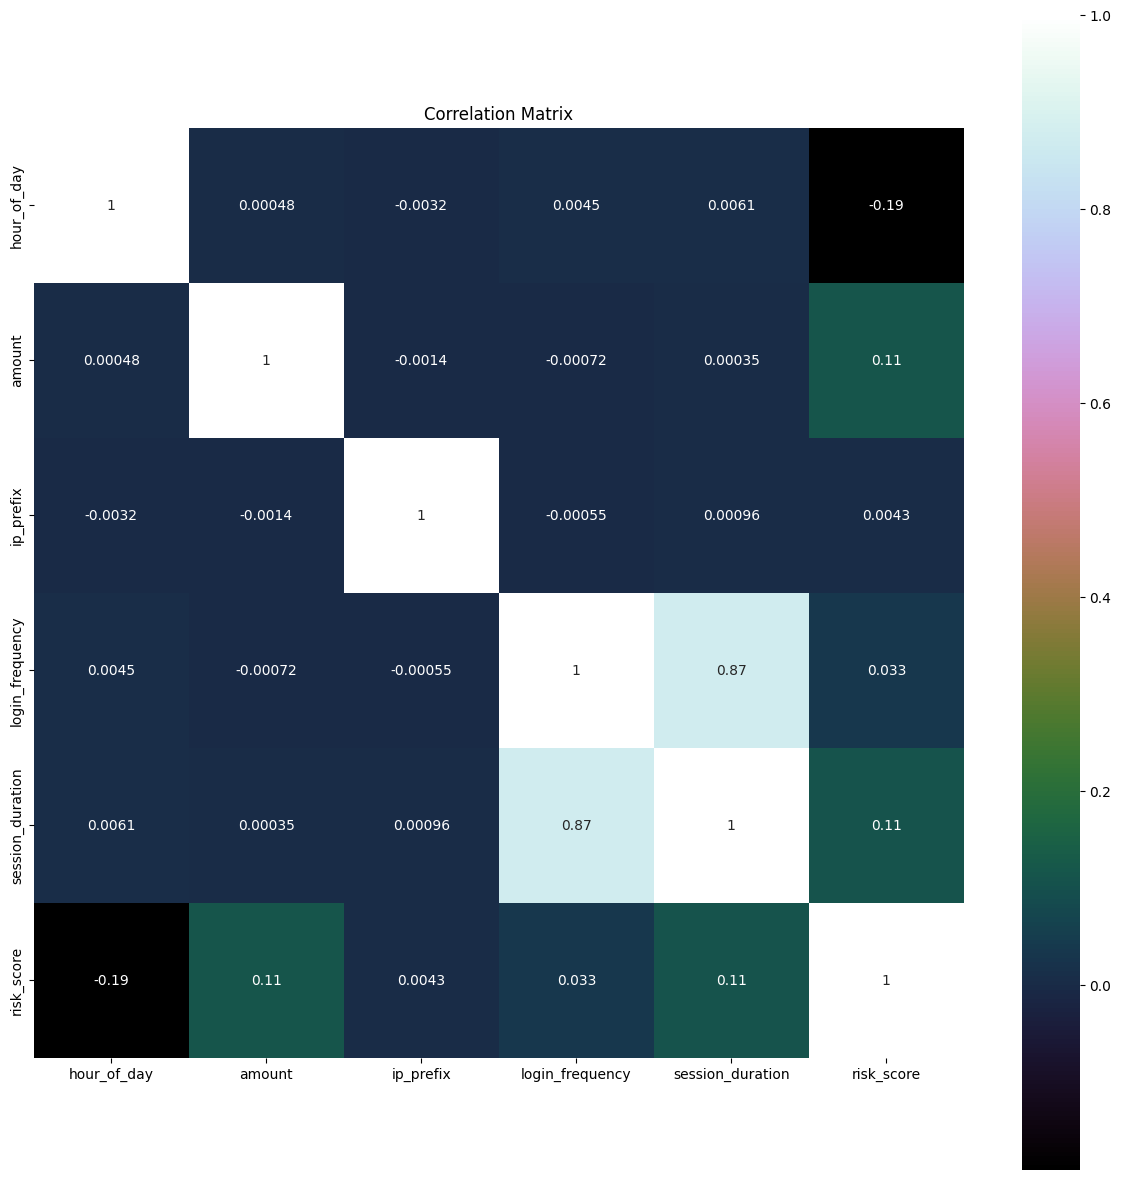

In [ ]:
# correlation
correlation = data[numeric_columns].corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As we can from the correlation matrix, the session duration and login frequency has a strong positive correlation and as a result one of this parameters should be dropped. Let it be session duration.

In [ ]:
data.drop('session_duration', axis=1, inplace=True)

In [ ]:
# Make a copy of the dataset to make a check-point in order of making a mistake
dataset = data.copy()

<Axes: xlabel='age_group', ylabel='count'>

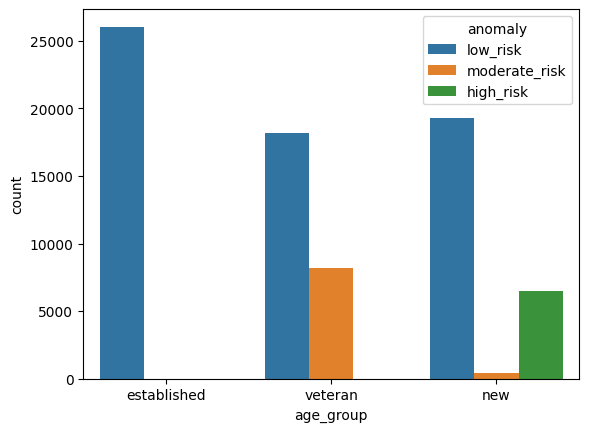

In [ ]:
sns.countplot(x=dataset['age_group'], hue=dataset['anomaly'])

In [ ]:
dataset.columns

Index(['hour_of_day', 'sending_address', 'receiving_address', 'amount',
       'transaction_type', 'location_region', 'ip_prefix', 'login_frequency',
       'purchase_pattern', 'age_group', 'risk_score', 'anomaly'],
      dtype='object')

<Axes: xlabel='transaction_type', ylabel='count'>

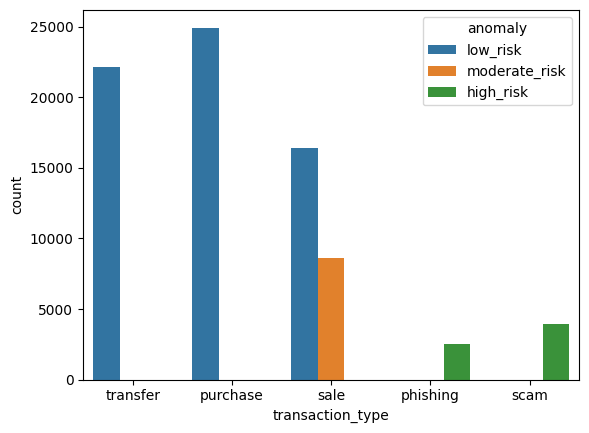

In [ ]:
sns.countplot(x=dataset['transaction_type'], hue=dataset['anomaly'])

<Axes: xlabel='location_region', ylabel='count'>

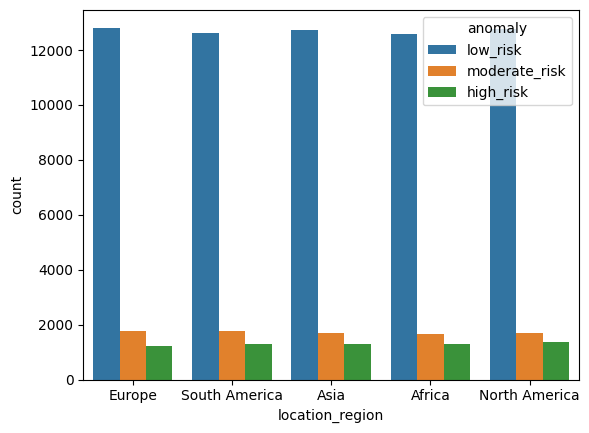

In [ ]:
sns.countplot(x=dataset['location_region'], hue=dataset['anomaly'])

<Axes: xlabel='purchase_pattern', ylabel='count'>

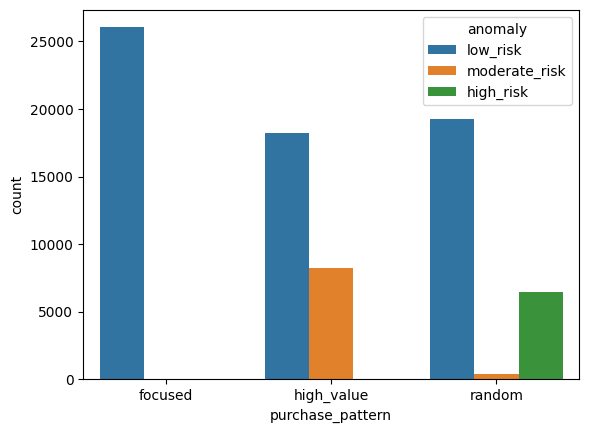

In [ ]:
sns.countplot(x=dataset['purchase_pattern'], hue=dataset['anomaly'])

<Axes: xlabel='login_frequency', ylabel='count'>

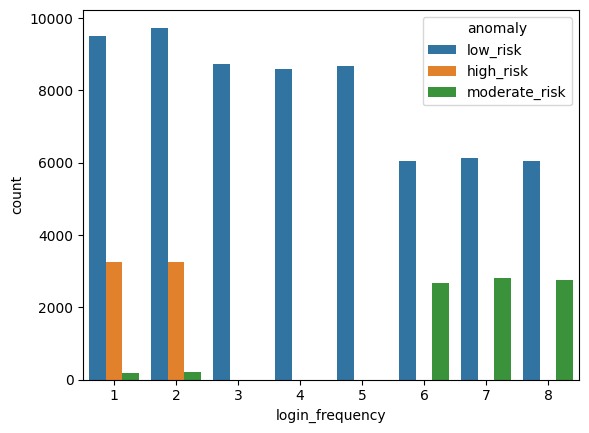

In [ ]:
sns.countplot(x=dataset['login_frequency'], hue=dataset['anomaly'])

As we can see from those graphs, the column location doesn't mean a lot of sense in order to predict the value of the risk. As a result, it would be dropped.

In [ ]:
dataset.drop('location_region', axis=1, inplace=True)

Risk, obviously, is a highly corrlated feature with the anomaly, that's why it is unnecassary as well.

In [ ]:
dataset.drop('risk_score', axis=1, inplace=True)

In [ ]:
dataset.head()

,hour_of_day,sending_address,receiving_address,amount,transaction_type,ip_prefix,login_frequency,purchase_pattern,age_group,anomaly
0,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,192.000,3,focused,established,low_risk
1,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,172.000,5,focused,established,low_risk
2,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,192.168,3,focused,established,low_risk
3,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,172.000,8,high_value,veteran,low_risk
4,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,172.160,6,high_value,veteran,moderate_risk


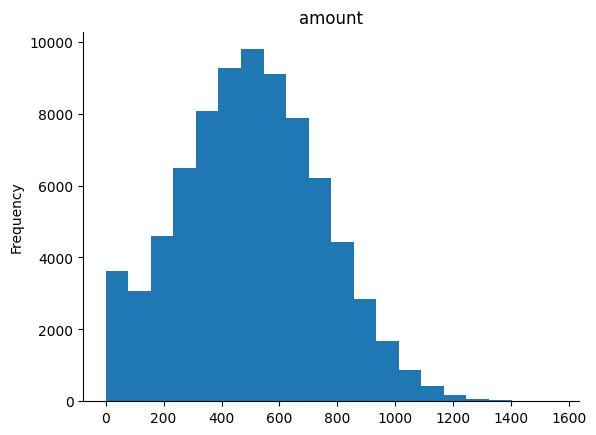

In [ ]:
# The amount distribution
dataset['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

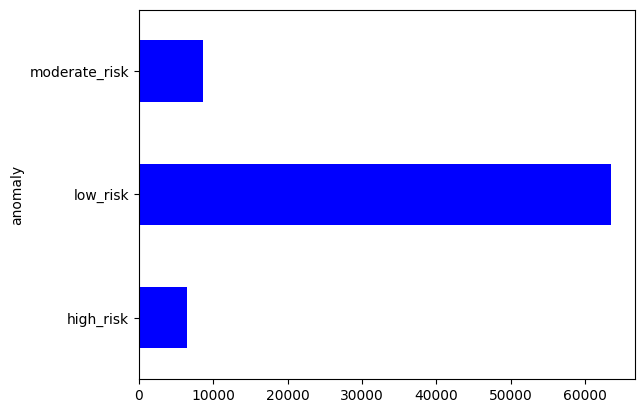

In [ ]:
fig = plt.figure()
plot = dataset.groupby(['anomaly']).size().plot(kind='barh', color='blue')
plt.show()

We need to sample our dataset because the use of the imbalanced data would let to grade the accuracy of the models correctly.

#**3. Data Preprocessing**

In [ ]:
dataset['anomaly'].value_counts()

anomaly
low_risk         63494
moderate_risk     8611
high_risk         6495
Name: count, dtype: int64

In [ ]:
data_0 = dataset.loc[dataset['anomaly'] == 'high_risk']
data_1 = dataset.loc[dataset['anomaly'] == 'moderate_risk']
data_2 = dataset.loc[dataset['anomaly'] == 'low_risk'][:15100]

sampled_data = pd.concat([data_0, data_1, data_2])

In [ ]:
sampled_data.columns

Index(['hour_of_day', 'sending_address', 'receiving_address', 'amount',
       'transaction_type', 'ip_prefix', 'login_frequency', 'purchase_pattern',
       'age_group', 'anomaly'],
      dtype='object')

In [ ]:
le = LabelEncoder()
y = le.fit_transform(sampled_data['anomaly'])

In [ ]:
sampled_data.drop('anomaly', axis=1, inplace=True)

In [ ]:
columns =  list(sampled_data.columns)
non_numeric_columns = [column for column in columns if sampled_data[column].dtype == 'object']
sampled_data[non_numeric_columns] = sampled_data[non_numeric_columns].apply(le.fit_transform)

In [ ]:
X = sampled_data

In [ ]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
validation_size = 0.2
seed = 3
X_train, X_validation, Y_train, Y_validation = train_test_split(rescaledX, y, test_size=validation_size, random_state=seed)

#**4. Machine Learning**

In [ ]:
num_folds = 10
scoring = 'accuracy'


In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# #Ensable Models
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.981584 (0.002910)
CART: 0.999752 (0.000496)
AB: 0.743253 (0.029021)
GBM: 0.999876 (0.000190)
RF: 0.999710 (0.000372)
ET: 0.996606 (0.001370)


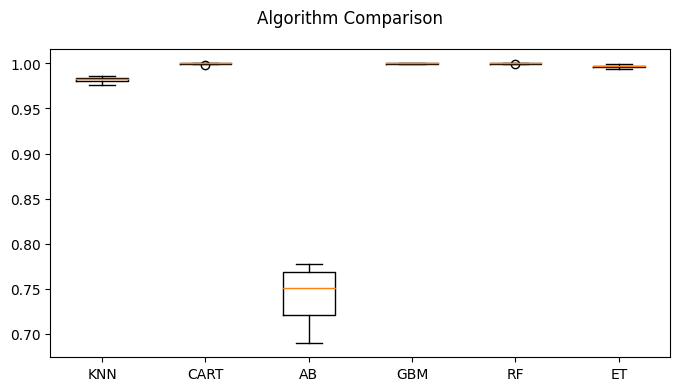

In [ ]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

In [ ]:
# prepare model
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[1323    0    0]
 [   0 3009    0]
 [   0    0 1710]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1323
           1       1.00      1.00      1.00      3009
           2       1.00      1.00      1.00      1710

    accuracy                           1.00      6042
   macro avg       1.00      1.00      1.00      6042
weighted avg       1.00      1.00      1.00      6042



<Axes: xlabel='Predicted', ylabel='Actual'>

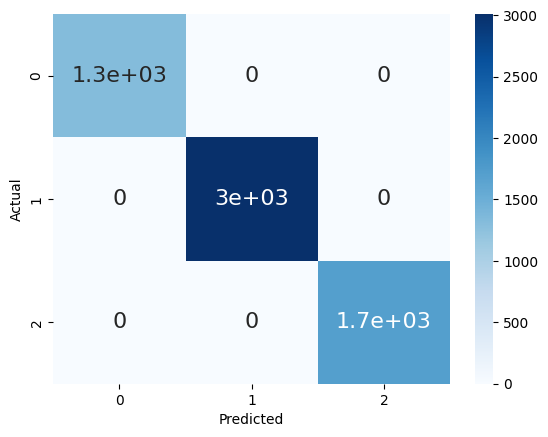

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})# font size